In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
train_datasets = "/kaggle/input/parkinsonproject/Parkinson/trainDatasets/"
test_datasets = "/kaggle/input/parkinsonproject/Parkinson/testDatasets/"

In [ ]:
train_data_genrator = ImageDataGenerator(rescale = 1./255,
                                        rotation_range=30,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        vertical_flip=False)



test_data_genrator = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_datagen = train_data_genrator.flow_from_directory(train_datasets,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = "categorical")


test_datagen = test_data_genrator.flow_from_directory(test_datasets,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = "categorical")

Found 15672 images belonging to 3 classes.
Found 1362 images belonging to 3 classes.


In [ ]:
15672+ 1326

16998

In [ ]:
16998*0.8

13598.400000000001

In [ ]:
image_size = 224
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3, 3), padding = "valid", input_shape = (image_size, image_size, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#1st Hidden Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#2n Hidden Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#3rd Hidden Layer
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

#Output Layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(3))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [ ]:
model.compile(loss = "categorical_crossentropy",
             optimizer = Adam(lr = 0.001),
             metrics = ['accuracy'])

In [ ]:
history = model.fit(train_datagen,
                    steps_per_epoch = train_datagen.samples//32,
                    epochs = 10,
                    validation_data=test_datagen,
                    validation_steps = test_datagen.samples//32)

Epoch 1/10
489/489 [==============================] - 219s 429ms/step - loss: 0.5979 - accuracy: 0.6919 - val_loss: 0.7660 - val_accuracy: 0.5967
Epoch 2/10
489/489 [==============================] - 173s 353ms/step - loss: 0.5392 - accuracy: 0.7342 - val_loss: 0.7524 - val_accuracy: 0.5260
Epoch 3/10
489/489 [==============================] - 172s 352ms/step - loss: 0.5241 - accuracy: 0.7381 - val_loss: 0.7113 - val_accuracy: 0.5536
Epoch 4/10
489/489 [==============================] - 172s 351ms/step - loss: 0.5163 - accuracy: 0.7451 - val_loss: 0.6143 - val_accuracy: 0.6875
Epoch 5/10
489/489 [==============================] - 171s 351ms/step - loss: 0.5142 - accuracy: 0.7469 - val_loss: 0.6067 - val_accuracy: 0.6897
Epoch 6/10
489/489 [==============================] - 173s 353ms/step - loss: 0.5066 - accuracy: 0.7473 - val_loss: 0.6186 - val_accuracy: 0.6994
Epoch 7/10
489/489 [==============================] - 173s 353ms/step - loss: 0.5019 - accuracy: 0.7513 - val_loss: 0.6145 -

In [ ]:
train_datagen.samples//32

489

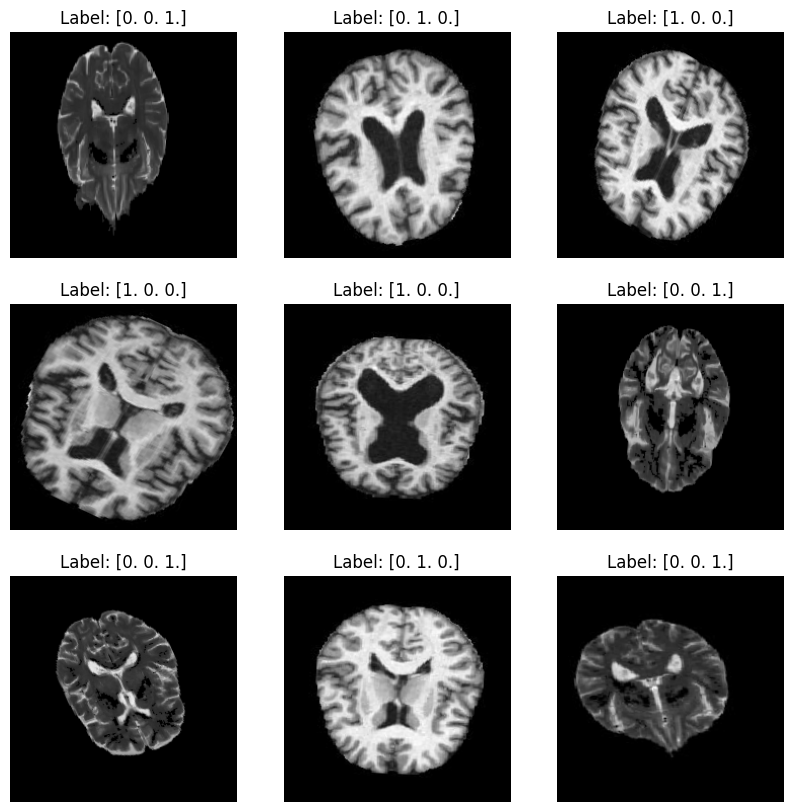

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def data_visuzalization(generator):
    batch = next(generator)
    images = batch[0]
    labels = batch[1]

    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title('Label: ' + str(labels[i]))
        plt.axis('off')
    plt.show()

data_visuzalization(train_datagen)

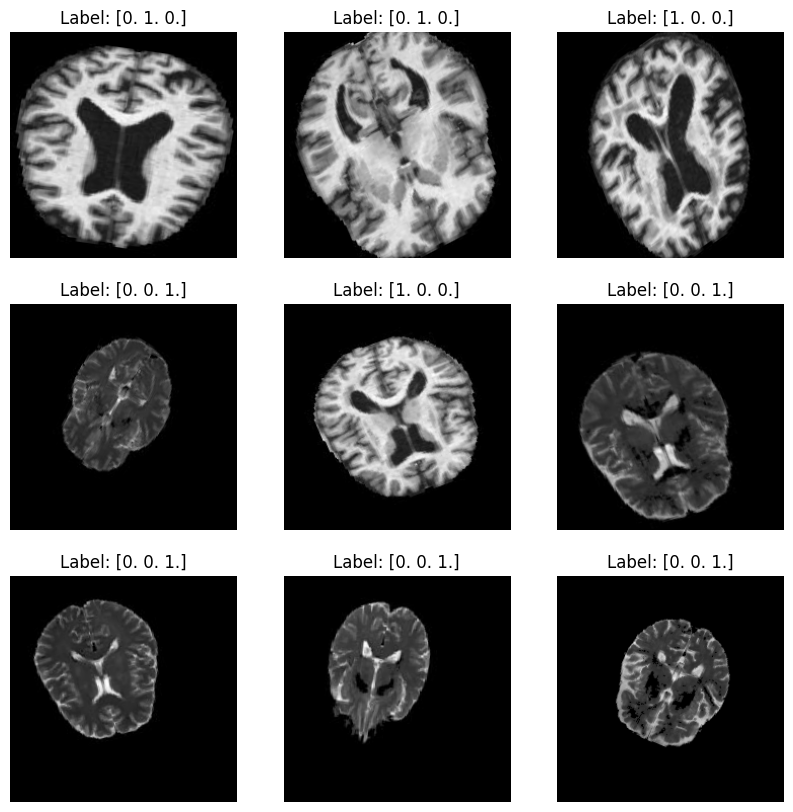

In [ ]:
data_visuzalization(train_datagen)

In [ ]:
epochs = 10
def model_vis(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss =  history.history['loss']
    val_loss =  history.history['val_loss']


    plt.figure(figsize =(6, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label = "Accuracy")
    plt.plot(epochs, val_acc, 'b', label = "Val Accuracy")
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label = "Loss")
    plt.plot(epochs, val_loss, 'b', label = "Val_loss")
    plt.legend()

    plt.show()

In [ ]:
test_data_genrator = ImageDataGenerator(rescale = 1./255)
test_datagen = test_data_genrator.flow_from_directory(test_datasets,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = "categorical")

Found 1362 images belonging to 3 classes.


In [ ]:
test_datagen.reset()

In [ ]:
model_predictions = model.predict(test_datagen)
model_predictions_class = np.argmax(model_predictions, axis = 1)
model_true_class = test_datagen.classes

43/43 [==============================] - 3s 61ms/step


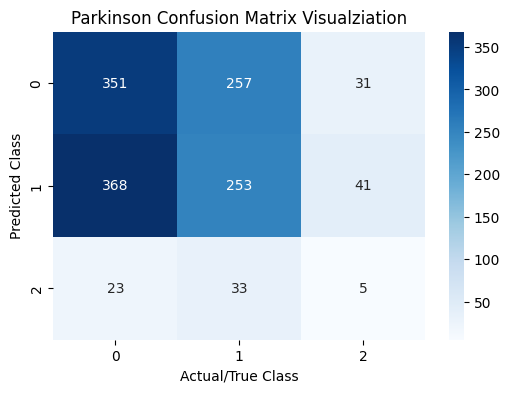

In [ ]:
cm = confusion_matrix(model_true_class, model_predictions_class)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot =True, fmt = 'd', cmap = "Blues")
plt.title("Parkinson Confusion Matrix Visualziation")
plt.xlabel("Actual/True Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
classfication_reports = classification_report(model_true_class, model_predictions_class)
print(classfication_reports)

              precision    recall  f1-score   support

           0       0.47      0.55      0.51       639
           1       0.47      0.38      0.42       662
           2       0.06      0.08      0.07        61

    accuracy                           0.45      1362
   macro avg       0.33      0.34      0.33      1362
weighted avg       0.45      0.45      0.45      1362

